<a href="https://colab.research.google.com/github/HMBinara/ML_Project/blob/main/Health_%26_Fitness_Improvement_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
#Inmport unnessari Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


Upload file

In [2]:
#Load the file
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


Data Preprocessing

In [3]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#number of data points &number of features
data.shape

(374, 13)

In [5]:
#geting some the information about tha dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


##Catogarical Features:

--Gender

--Occupation

--BMI Category

--Blood Pressure

--Sleep Disorder

In [6]:
#Cheaking for missing Values
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


##Handling Missing Values

Replacing the missing Value in "Sleep Disorder" with mode

In [7]:
mode_of_Sleep_Disorder = data.pivot_table(values='Sleep Disorder', columns='Quality of Sleep', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Sleep_Disorder)


Quality of Sleep            4         5            6         7         8  \
Sleep Disorder    Sleep Apnea  Insomnia  Sleep Apnea  Insomnia  Insomnia   

Quality of Sleep            9  
Sleep Disorder    Sleep Apnea  


In [8]:
missing_value = data['Sleep Disorder'].isnull()
print(missing_value)

0       True
1       True
2       True
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Name: Sleep Disorder, Length: 374, dtype: bool


In [9]:
data.loc[missing_value, 'Sleep Disorder'] = data.loc[missing_value, 'Quality of Sleep'].apply(lambda x: mode_of_Sleep_Disorder[x])

In [10]:
data.isnull().sum()


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Data Analysis

In [11]:
#Statical mesure about the Data
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Distrbute the Numerical Value

<Figure size 1000x500 with 0 Axes>

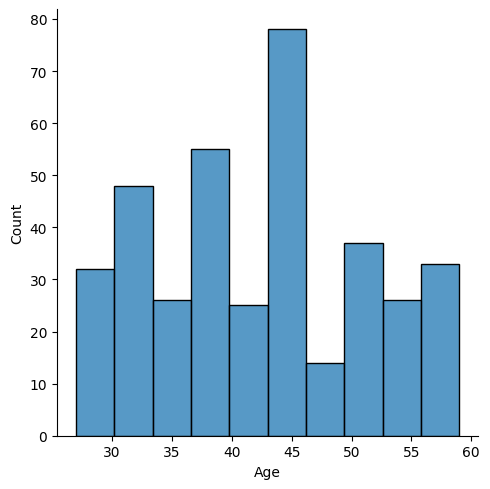

In [12]:
#Age Distribution
plt.figure(figsize=(10,5))
sns.displot(data['Age'])
plt.show()

<Figure size 600x600 with 0 Axes>

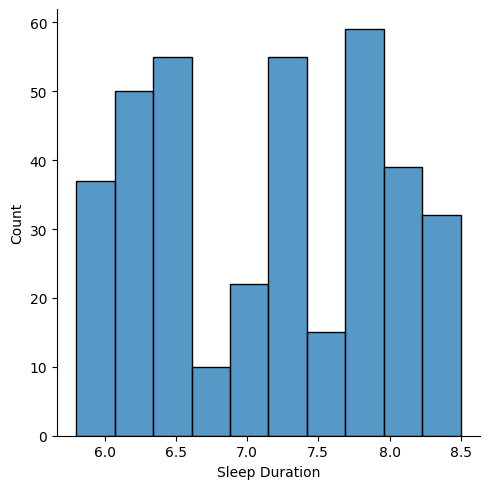

In [13]:
#Sleep Duration Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Sleep Duration'])
plt.show()

<Figure size 1000x500 with 0 Axes>

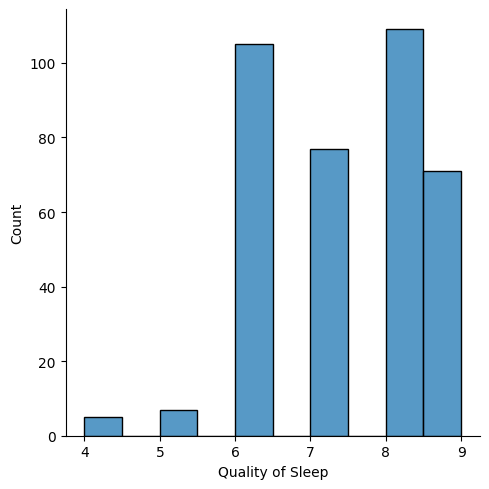

In [14]:
#Quality of Sleep Distribution
plt.figure(figsize=(10,5))
sns.displot(data['Quality of Sleep'])
plt.show()

<Figure size 600x600 with 0 Axes>

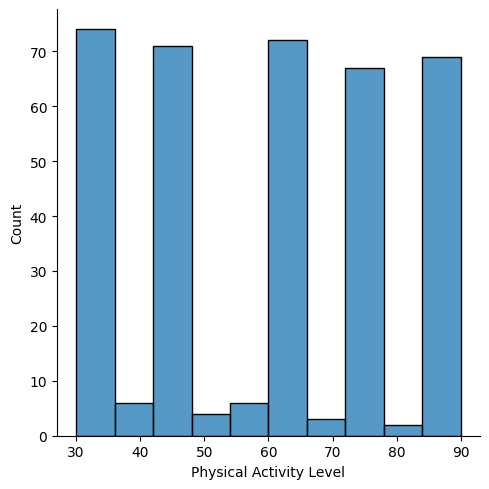

In [15]:
#Physical Activity Level Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Physical Activity Level'])
plt.show()

<Figure size 600x600 with 0 Axes>

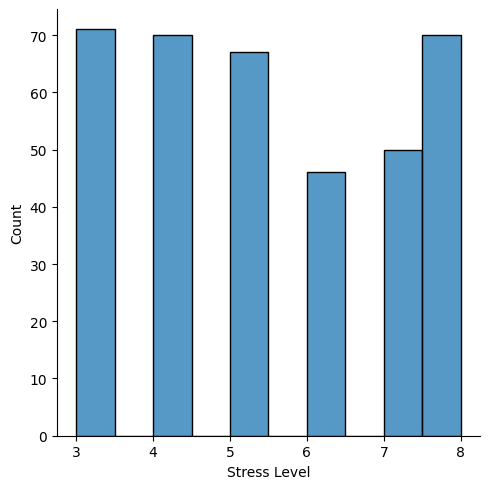

In [16]:
#Stress Level Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Stress Level'])
plt.show()

<Figure size 600x600 with 0 Axes>

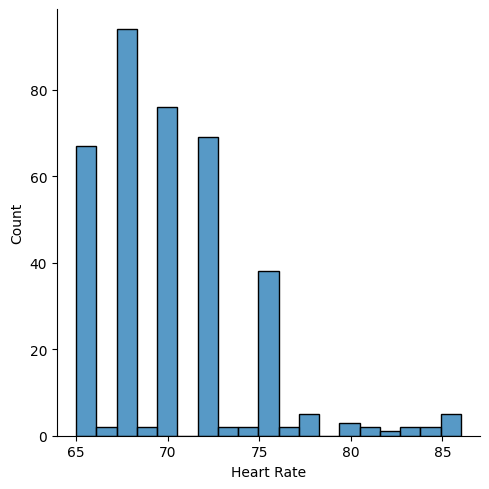

In [17]:
#Heart Rate Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Heart Rate'])
plt.show()

<Figure size 600x600 with 0 Axes>

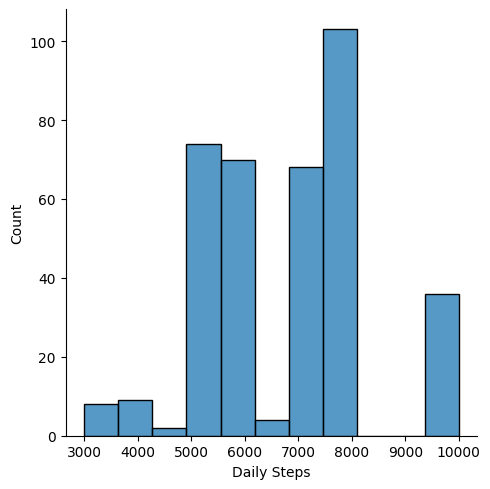

In [18]:
#Daily Steps Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Daily Steps'])
plt.show()

Distribue the Catogerical Value

##Catogarical Features:

--Gender

--Occupation

--BMI Category


--Sleep Disorder

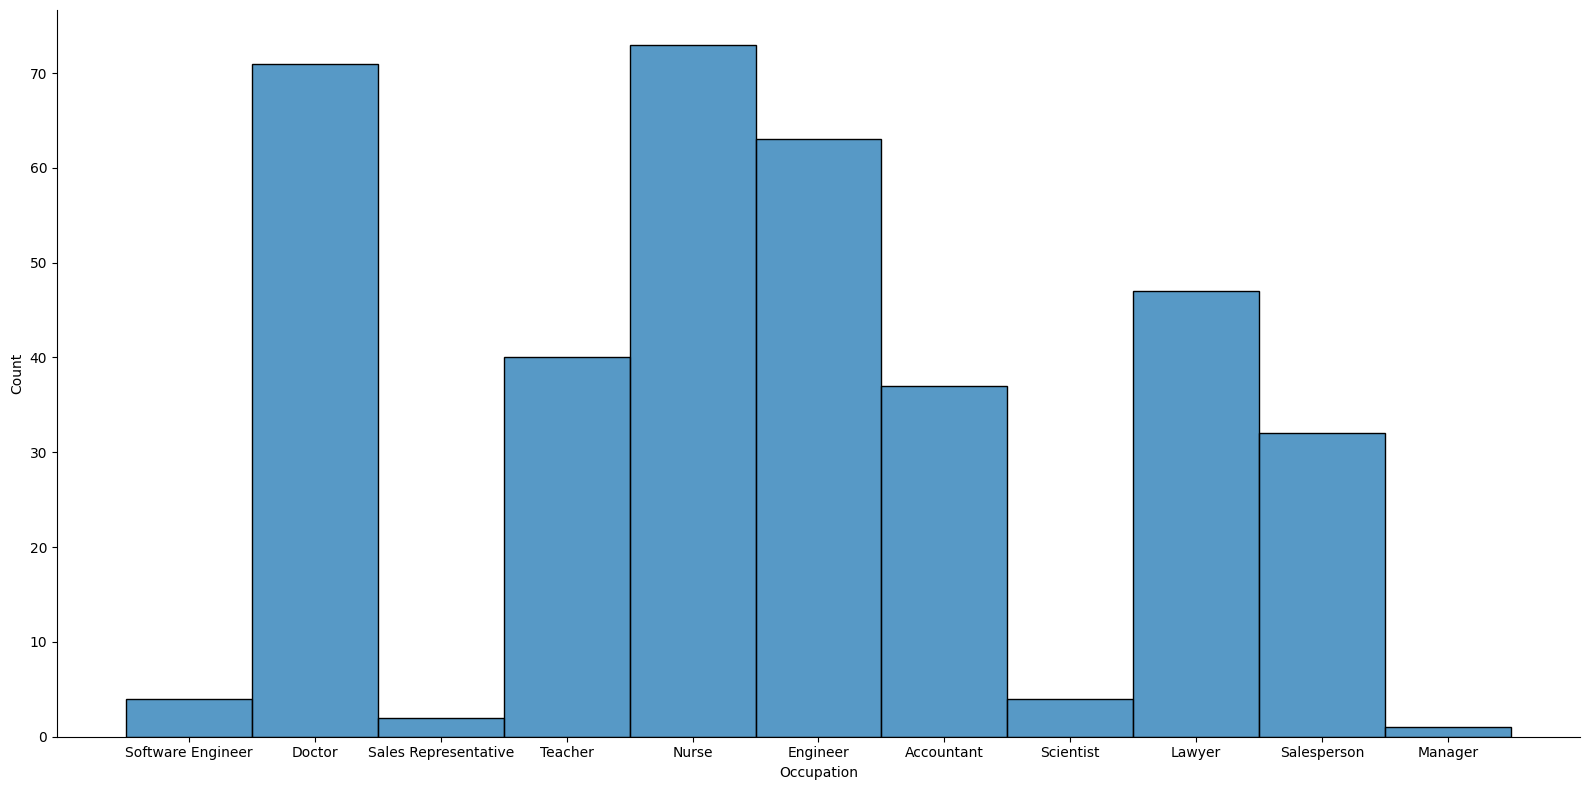

In [24]:
#Occupation
sns.displot(data['Occupation'], height=8, aspect=2)
plt.show()

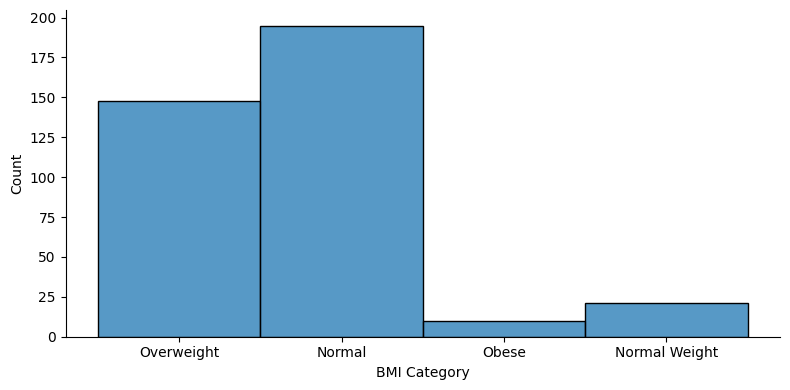

In [27]:
#BMI Category
sns.displot(data['BMI Category'], height=4, aspect=2)
plt.show()

### Converting 'Gender' to Numerical Features

We will use `LabelEncoder` to convert the categorical 'Gender' column into numerical values. This is appropriate as 'Gender' has only two distinct values.

In [34]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

print("Unique values in 'Sleep Disorder' after encoding:", data['Sleep Disorder'].unique())
print("Unique values in 'BMI Category' after encoding:", data['BMI Category'].unique())
print("Unique values in 'Occupation' after encoding:", data['Occupation'].unique())
print("Unique values in 'Gender' after encoding:", data['Gender'].unique())
display(data.head())

Unique values in 'Sleep Disorder' after encoding: [1 0]
Unique values in 'BMI Category' after encoding: [3 0 2 1]
Unique values in 'Occupation' after encoding: [ 9  1  6 10  5  2  0  8  3  7  4]
Unique values in 'Gender' after encoding: [1 0]


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140,90


### Converting 'Blood Pressure' to Numerical Features

Since 'Blood Pressure' is in 'systolic/diastolic' string format, we will split it into two new numerical columns: 'Systolic Blood Pressure' and 'Diastolic Blood Pressure'.

In [32]:
# Split 'Blood Pressure' into two new columns
data[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = data['Blood Pressure'].str.split('/', expand=True)

# Convert new columns to integer type
data['Systolic Blood Pressure'] = data['Systolic Blood Pressure'].astype(int)
data['Diastolic Blood Pressure'] = data['Diastolic Blood Pressure'].astype(int)

# Drop the original 'Blood Pressure' column
data = data.drop('Blood Pressure', axis=1)

print("Dataframe after converting Blood Pressure:")
display(data.head())

Dataframe after converting Blood Pressure:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,1,27,9,6.1,6,42,6,3,77,4200,Sleep Apnea,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,Sleep Apnea,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,Sleep Apnea,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90


### Converting 'Sleep Disorder' to Numerical Features

We will use `LabelEncoder` to convert the categorical 'Sleep Disorder' column into numerical values.

In [33]:
label_encoder_sleep_disorder = LabelEncoder()
data['Sleep Disorder'] = label_encoder_sleep_disorder.fit_transform(data['Sleep Disorder'])

print("Unique values in 'Sleep Disorder' after encoding:", data['Sleep Disorder'].unique())
display(data.head())

Unique values in 'Sleep Disorder' after encoding: [1 0]


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140,90


### Dividing the Data into Features (X) and Target (Y)



In [35]:
# Drop 'Person ID' as it is an identifier and not a feature
data = data.drop('Person ID', axis=1)

X = data.drop('Sleep Duration', axis=1)
Y = data['Sleep Duration']

print("Shape of X (features):", X.shape)
print("Shape of Y (target):", Y.shape)

display(X.head())
display(Y.head())

Shape of X (features): (374, 12)
Shape of Y (target): (374,)


,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,27,9,6,42,6,3,77,4200,1,126,83
1,1,28,1,6,60,8,0,75,10000,1,125,80
2,1,28,1,6,60,8,0,75,10000,1,125,80
3,1,28,6,4,30,8,2,85,3000,1,140,90
4,1,28,6,4,30,8,2,85,3000,1,140,90


,Sleep Duration
0,6.1
1,6.2
2,6.2
3,5.9
4,5.9


### Correlation Chart

Let's visualize the correlation matrix of the numerical features in the dataset to understand their relationships, especially with 'Sleep Duration'.

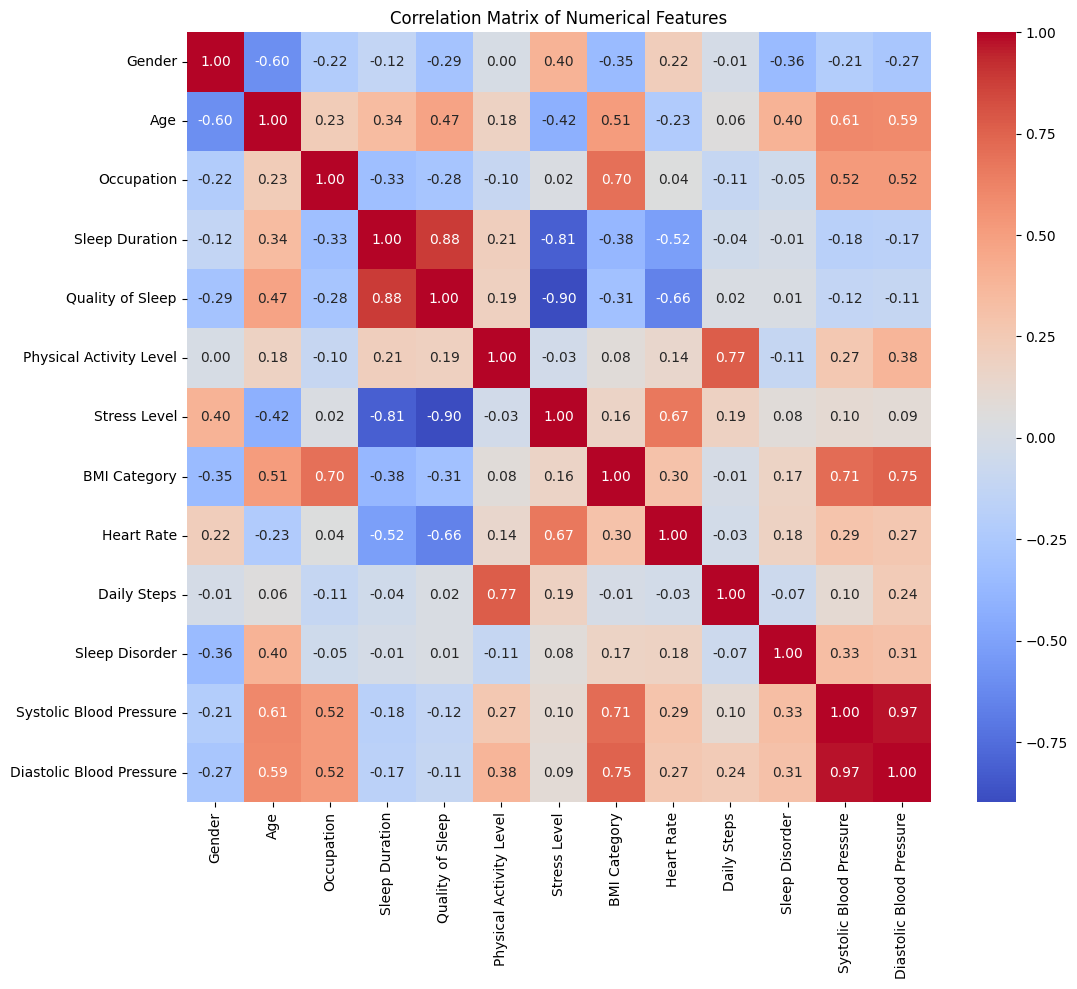

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [36]:
# Split data
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.2, random_state=2)
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape

((299, 12), (75, 12), (299,), (75,))

Traing the Model

In [39]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)



RandomForestRegressor(random_state=42)

In [40]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R-squared Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R-squared Score: 0.98
Mean Absolute Error: 0.09


In [41]:
import pickle
from google.colab import files

# Define the filename for the pickled model
model_filename = 'Health&Fitness.pkl'

# Save the model to a file using pickle
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as '{model_filename}'")

# Download the file to your local machine
files.download(model_filename)

Model saved as 'Health&Fitness.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>